### EDA-数据探索性分析
**1. EDA目标**

    EDA的价值主要在于熟悉数据集，了解数据集，对数据集进行验证来确定所获得数据集可以用于接下来的机器学习或者深度学习使用。

    当了解了数据集之后我们下一步就是要去了解变量间的相互关系以及变量与预测值之间的存在关系。

    引导数据科学从业者进行数据处理以及特征工程的步骤,使数据集的结构和特征集让接下来的预测问题更加可靠。

    完成对于数据的探索性分析，并对于数据进行一些图表或者文字总结并打卡。

**2. 内容介绍**
##### 2.1 载入各种数据科学以及可视化库
    数据科学库 pandas、numpy、scipy；
    可视化库 matplotlib、seabon；
    其他；
##### 2.2 载入数据
    载入训练集和测试集；
    简略观察数据(head()+shape)；
##### 2.3 数据总览:
    通过describe()来熟悉数据的相关统计量
    通过info()来熟悉数据类型
##### 2.4 判断数据缺失和异常
    查看每列的存在nan情况
    异常值检测
##### 2.5了解预测值的分布
    总体分布概况（无界约翰逊分布等）
    查看skewness and kurtosis
    查看预测值的具体频数
##### 2.6 特征分为类别特征和数字特征，并对类别特征查看unique分布
##### 2.7 数字特征分析
    相关性分析
    查看几个特征得 偏度和峰值
    每个数字特征得分布可视化
    数字特征相互之间的关系可视化
    多变量互相回归关系可视化
##### 2.8 类型特征分析
    unique分布
    类别特征箱形图可视化
    类别特征的小提琴图可视化
    类别特征的柱形图可视化类别
    特征的每个类别频数可视化(count_plot)
##### 2.9 用pandas_profiling生成数据报告
**3. 代码示例**

In [39]:
#coding:utf-8
#导入warnings包，利用过滤器来实现忽略警告语句。
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
# 1) 载入数据
train_data = pd.read_csv('./data/used_car_train_20200313.csv', sep=' ')
test_data = pd.read_csv('./data/used_car_test_20200313.csv', sep=' ')

In [4]:
# 2) 简略观察数据(head()+shape)
train_data.head().append(train_data.tail())
test_data.head().append(test_data.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,150000,66932,20111212,222.0,4,5.0,1.0,1.0,313,15.0,...,0.264405,0.121800,0.070899,0.106558,0.078867,-7.050969,-0.854626,4.800151,0.620011,-3.664654
1,150001,174960,19990211,19.0,21,0.0,0.0,0.0,75,12.5,...,0.261745,0.000000,0.096733,0.013705,0.052383,3.679418,-0.729039,-3.796107,-1.541230,-0.757055
2,150002,5356,20090304,82.0,21,0.0,0.0,0.0,109,7.0,...,0.260216,0.112081,0.078082,0.062078,0.050540,-4.926690,1.001106,0.826562,0.138226,0.754033
3,150003,50688,20100405,0.0,0,0.0,0.0,1.0,160,7.0,...,0.260466,0.106727,0.081146,0.075971,0.048268,-4.864637,0.505493,1.870379,0.366038,1.312775
4,150004,161428,19970703,26.0,14,2.0,0.0,0.0,75,15.0,...,0.250999,0.000000,0.077806,0.028600,0.081709,3.616475,-0.673236,-3.197685,-0.025678,-0.101290
49995,199995,20903,19960503,4.0,4,4.0,0.0,0.0,116,15.0,...,0.284664,0.130044,0.049833,0.028807,0.004616,-5.978511,1.303174,-1.207191,-1.981240,-0.357695
49996,199996,708,19991011,0.0,0,0.0,0.0,0.0,75,15.0,...,0.268101,0.108095,0.066039,0.025468,0.025971,-3.913825,1.759524,-2.075658,-1.154847,0.169073
49997,199997,6693,20040412,49.0,1,0.0,1.0,1.0,224,15.0,...,0.269432,0.105724,0.117652,0.057479,0.015669,-4.639065,0.654713,1.137756,-1.390531,0.254420
49998,199998,96900,20020008,27.0,1,0.0,0.0,1.0,334,15.0,...,0.261152,0.000490,0.137366,0.086216,0.051383,1.833504,-2.828687,2.465630,-0.911682,-2.057353
49999,199999,193384,20041109,166.0,6,1.0,NaN,1.0,68,9.0,...,0.228730,0.000300,0.103534,0.080625,0.124264,2.914571,-1.135270,0.547628,2.094057,-1.552150


In [5]:
train_data.shape, test_data.shape

((150000, 31), (50000, 30))

In [6]:
# 3) 总览数据概况 describe() + info()
train_data.describe()
test_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,48587.000000,47107.000000,48090.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,174999.500000,68542.223280,2.003393e+07,46.844520,8.056240,1.782185,0.373405,0.224350,119.883620,12.595580,...,0.248669,0.045021,0.122744,0.057997,0.062000,-0.017855,-0.013742,-0.013554,-0.003147,0.001516
std,14433.901067,61052.808133,5.368870e+04,49.469548,7.819477,1.760736,0.546442,0.417158,185.097387,3.908979,...,0.044601,0.051766,0.195972,0.029211,0.035653,3.747985,3.231258,2.515962,1.286597,1.027360
min,150000.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.160049,-5.411964,-8.916949,-4.123333,-6.112667
25%,162499.750000,11203.500000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243762,0.000044,0.062644,0.035084,0.033714,-3.700121,-1.971325,-1.876703,-1.060428,-0.437920
50%,174999.500000,52248.500000,2.003091e+07,29.000000,6.000000,1.000000,0.000000,0.000000,109.000000,15.000000,...,0.257877,0.000815,0.095828,0.057084,0.058764,1.613212,-0.355843,-0.142779,-0.035956,0.138799
75%,187499.250000,118856.500000,2.007110e+07,65.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265328,0.102025,0.125438,0.079077,0.087489,2.832708,1.262914,1.764335,0.941469,0.681163
max,199999.000000,196805.000000,2.015121e+07,246.000000,39.000000,7.000000,6.000000,1.000000,20000.000000,15.000000,...,0.291618,0.153265,1.358813,0.156355,0.214775,12.338872,18.856218,12.950498,5.913273,2.624622


In [7]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

In [8]:
# 4) 判断数据缺失和异常
train_data.isnull().any()
test_data.isnull().any()
train_data.isnull().sum()
test_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1413
fuelType             2893
gearbox              1910
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

<AxesSubplot:>

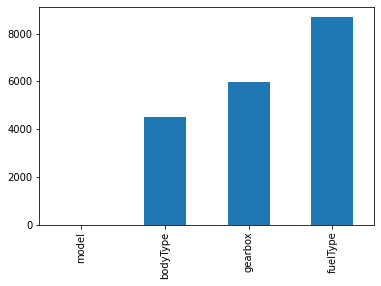

In [9]:
# nan可视化
missing = train_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

<AxesSubplot:>

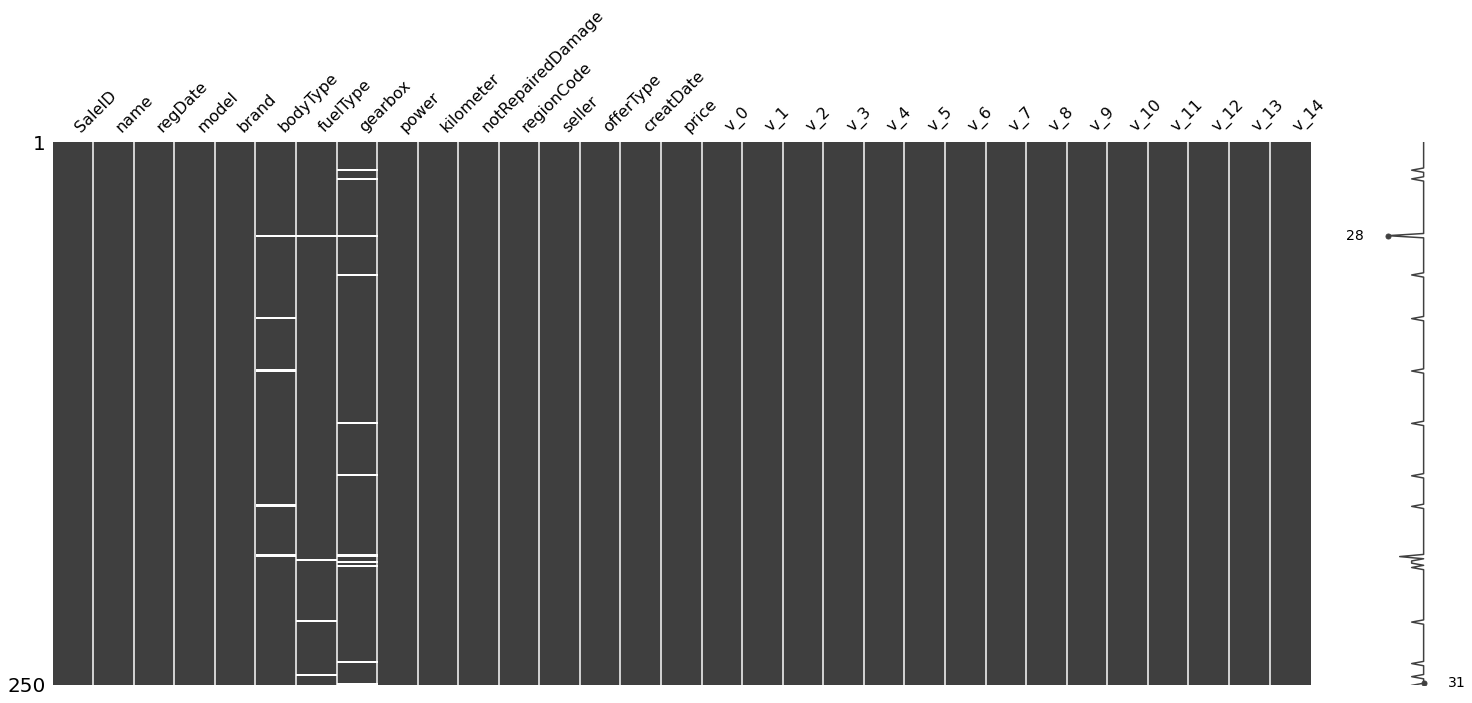

In [10]:
# 可视化看下缺省值
msno.matrix(train_data.sample(250))

<AxesSubplot:>

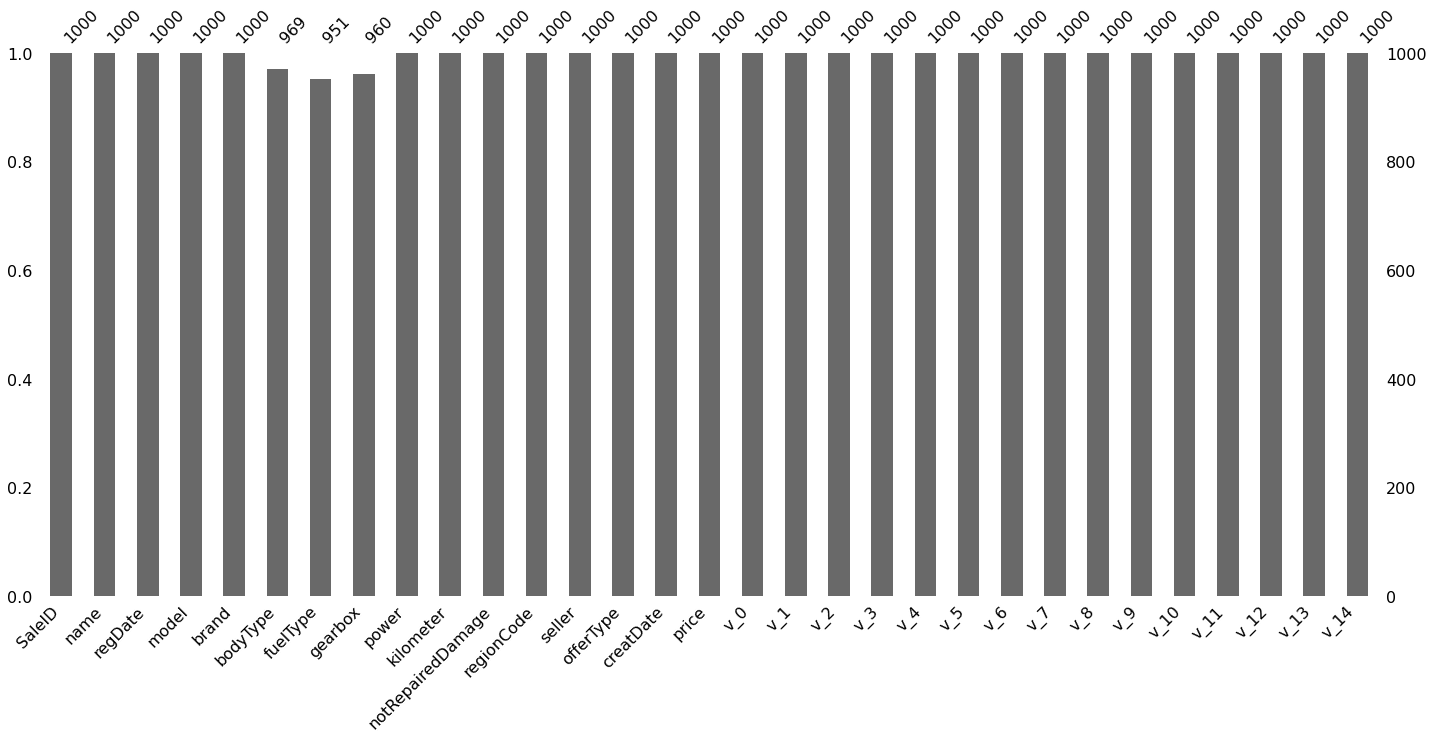

In [11]:
msno.bar(train_data.sample(1000))

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

In [15]:
# 可以发现除了notRepairedDamage 为object类型其他都为数字 这里我们把他的几个不同的值都进行显示就知道了
train_data['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

In [18]:
# 可以看出来‘ - ’也为空缺值，因为很多模型对nan有直接的处理，这里我们先不做处理，先替换成nan
train_data['notRepairedDamage'].replace('-', np.nan, inplace=True)
train_data['notRepairedDamage'].value_counts()

0.0    111361
1.0     14315
Name: notRepairedDamage, dtype: int64

In [19]:
train_data.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    1
brand                    0
bodyType              4506
fuelType              8680
gearbox               5981
power                    0
kilometer                0
notRepairedDamage    24324
regionCode               0
seller                   0
offerType                0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
dtype: int64

In [20]:
test_data['notRepairedDamage'].value_counts()

0.0    37249
-       8031
1.0     4720
Name: notRepairedDamage, dtype: int64

In [21]:
test_data['notRepairedDamage'].replace('-', np.nan, inplace=True)
test_data['notRepairedDamage'].value_counts()

0.0    37249
1.0     4720
Name: notRepairedDamage, dtype: int64

In [25]:
# 以下两个类别特征严重倾斜，一般不会对预测有什么帮助，故这边先删掉，当然你也可以继续挖掘，但是一般意义不大
train_data.drop(columns=['seller', 'offerType'], axis=1, inplace=True)
test_data.drop(columns=['seller', 'offerType'], axis=1, inplace=True)

AttributeError: 'Rectangle' object has no property 'fit'

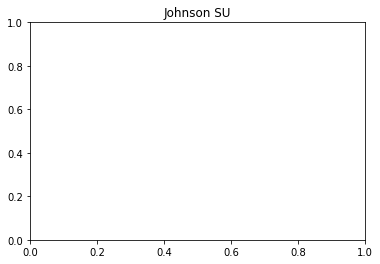

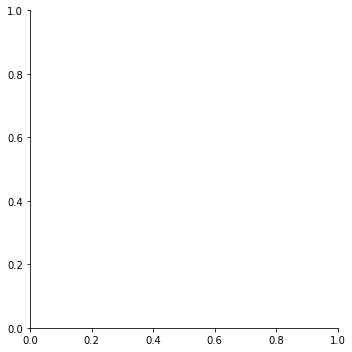

In [40]:
# 5)了解预测值的分布
train_data['price'].value_counts()
# 总体分布概况（无界约翰逊分布等）
import scipy.stats as st
y_train = train_data['price']
plt.figure(1); plt.title('Johnson SU')
sns.displot(y_train, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.displot(y_train, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.displot(y_train, kde=False, fit=st.lognorm)

In [29]:
sns.displot??